In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from matplotlib import font_manager, rc

In [2]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name) # 한글 출력 설정 부분

In [22]:
data_pch_df = pd.read_csv("팀투수_통합.csv")
data_pch_df.head(5)

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,CG_CK,WLS,HOLD,INN2,...,KK,GD,WP,BK,ERR,R,ER,P_WHIP_RT,P2_WHIP_RT,CB_WHIP_RT
0,20180324HHWO0,20180324,WO,HH,0,B,0,W,2,27,...,9,0,0,0,1,3,2,1.090909,1.600000,2.250000
1,20180324HHWO0,20180324,HH,WO,0,T,0,L,0,24,...,10,0,2,0,0,6,5,1.750000,3.000000,2.250000
2,20180324KTHT0,20180324,HT,KT,0,B,0,L,0,27,...,9,0,0,0,0,5,5,2.000000,1.333333,1.500000
3,20180324KTHT0,20180324,KT,HT,0,T,0,W,2,27,...,8,0,0,0,0,4,4,1.200000,1.555556,2.625000
4,20180324LGNC0,20180324,NC,LG,0,B,0,W,2,27,...,9,1,0,0,0,2,2,0.000000,0.777778,1.333333


In [23]:
#승패에 큰 영향없는 변수 제거
del data_pch_df['G_ID']
del data_pch_df['GDAY_DS']
del data_pch_df['VS_T_ID']
del data_pch_df['HEADER_NO']
del data_pch_df['TB_SC']
del data_pch_df['WLS']
del data_pch_df['R']
data_pch_df.head(2)

,T_ID,CG_CK,HOLD,INN2,BF,PA,AB,HIT,H2,H3,...,HP,KK,GD,WP,BK,ERR,ER,P_WHIP_RT,P2_WHIP_RT,CB_WHIP_RT
0,WO,0,2,27,152,38,37,13,0,1,...,0,9,0,0,0,1,2,1.090909,1.6,2.25
1,HH,0,0,24,173,41,37,12,3,0,...,0,10,0,2,0,0,5,1.750000,3.0,2.25


In [24]:
#팀별로 나누기
OB = data_pch_df[data_pch_df['T_ID']=='OB']
HH = data_pch_df[data_pch_df['T_ID']=='HH']
HT = data_pch_df[data_pch_df['T_ID']=='HT']
KT = data_pch_df[data_pch_df['T_ID']=='KT']
LG = data_pch_df[data_pch_df['T_ID']=='LG']
LT = data_pch_df[data_pch_df['T_ID']=='LT']
NC = data_pch_df[data_pch_df['T_ID']=='NC']
SK = data_pch_df[data_pch_df['T_ID']=='SK']
SS = data_pch_df[data_pch_df['T_ID']=='SS']
WO = data_pch_df[data_pch_df['T_ID']=='WO']

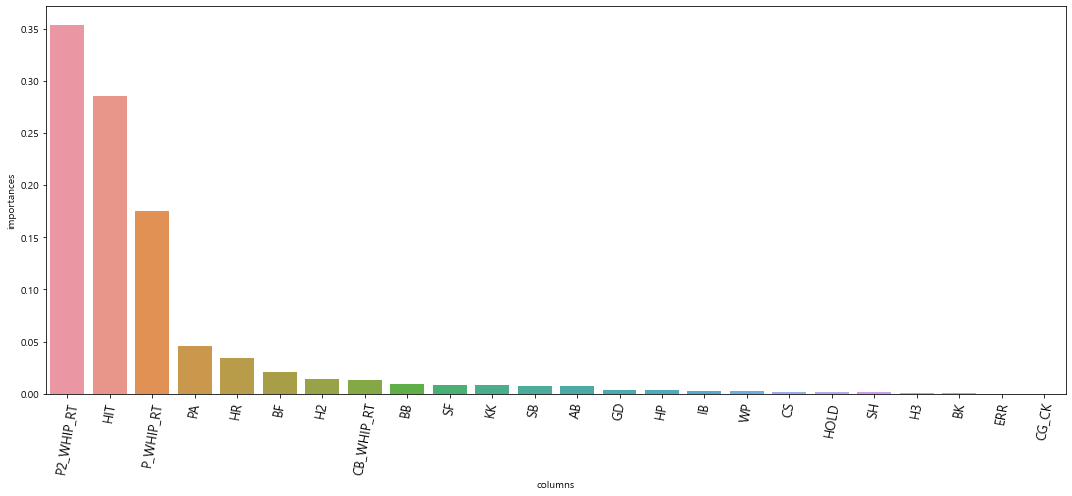

In [25]:
# OB(두산)
del OB['T_ID']
x = OB.drop(['ER','INN2'], axis=1).values # 독립변인들의 value값만 추출
y = (OB['ER'].values*9)/(OB['INN2'].values/3) # 종속변인 추출


features = list(OB.columns)
features.remove('ER')
features.remove('INN2')
df = pd.DataFrame(x, columns=features)

# RandomForest
clf = RandomForestRegressor(random_state=42, max_depth=6)
clf.fit(x, y)
feature_importance = clf.feature_importances_

# plot
df_fi = pd.DataFrame({'columns':df.columns, 'importances':feature_importance})
df_fi = df_fi[df_fi['importances'] > 0] 
df_fi = df_fi.sort_values(by=['importances'], ascending=False)

fig = plt.figure(figsize=(15,7))
ax = sns.barplot(df_fi['columns'], df_fi['importances'])
ax.set_xticklabels(df_fi['columns'], rotation=80, fontsize=13)
plt.tight_layout()
plt.show()

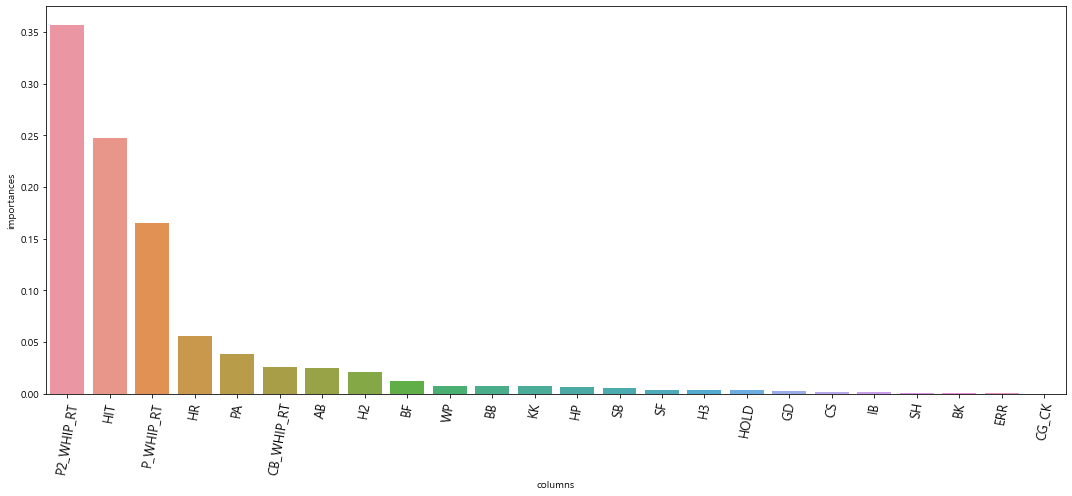

In [26]:
# HH(한화)
del HH['T_ID']
x = HH.drop(['ER','INN2'], axis=1).values # 독립변인들의 value값만 추출
y = (HH['ER'].values*9)/(HH['INN2'].values/3) # 종속변인 추출


features = list(HH.columns)
features.remove('ER')
features.remove('INN2')
df = pd.DataFrame(x, columns=features)

# RandomForest
clf = RandomForestRegressor(random_state=42, max_depth=6)
clf.fit(x, y)
feature_importance = clf.feature_importances_

# plot
df_fi = pd.DataFrame({'columns':df.columns, 'importances':feature_importance})
df_fi = df_fi[df_fi['importances'] > 0] 
df_fi = df_fi.sort_values(by=['importances'], ascending=False)

fig = plt.figure(figsize=(15,7))
ax = sns.barplot(df_fi['columns'], df_fi['importances'])
ax.set_xticklabels(df_fi['columns'], rotation=80, fontsize=13)
plt.tight_layout()
plt.show()

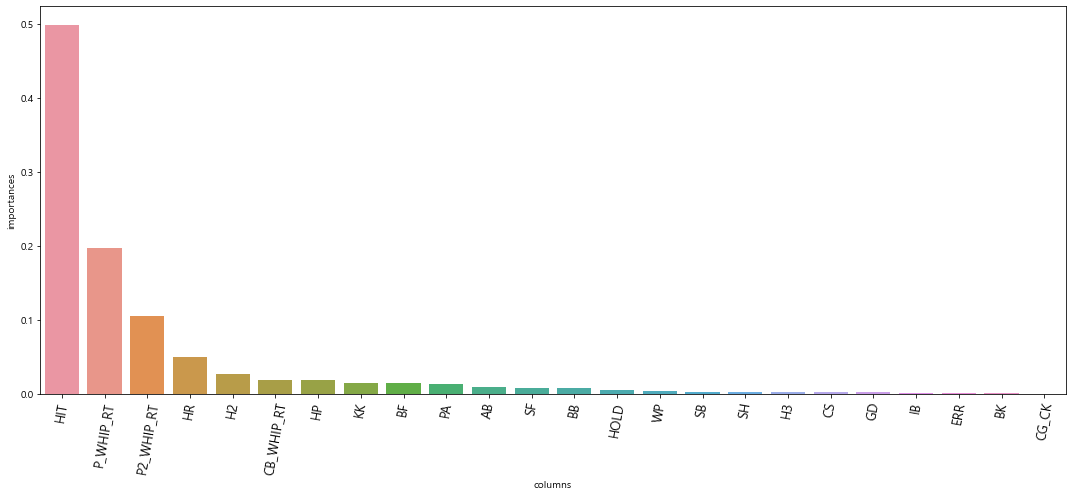

In [27]:
# HT(KIA)
del HT['T_ID']
x = HT.drop(['ER','INN2'], axis=1).values # 독립변인들의 value값만 추출
y = (HT['ER'].values*9)/(HT['INN2'].values/3) # 종속변인 추출


features = list(HT.columns)
features.remove('ER')
features.remove('INN2')
df = pd.DataFrame(x, columns=features)

# RandomForest
clf = RandomForestRegressor(random_state=42, max_depth=6)
clf.fit(x, y)
feature_importance = clf.feature_importances_

# plot
df_fi = pd.DataFrame({'columns':df.columns, 'importances':feature_importance})
df_fi = df_fi[df_fi['importances'] > 0] 
df_fi = df_fi.sort_values(by=['importances'], ascending=False)

fig = plt.figure(figsize=(15,7))
ax = sns.barplot(df_fi['columns'], df_fi['importances'])
ax.set_xticklabels(df_fi['columns'], rotation=80, fontsize=13)
plt.tight_layout()
plt.show()

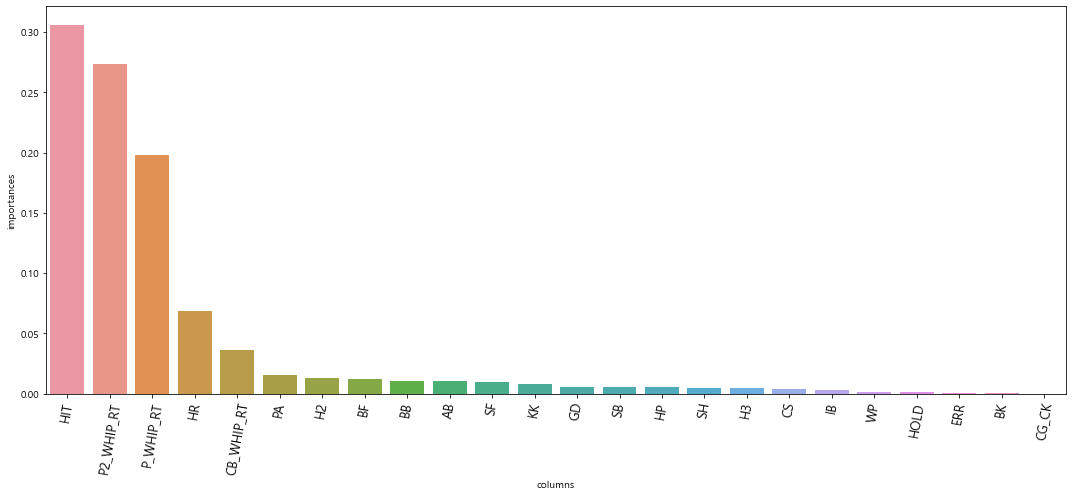

In [28]:
# KT(KT)
del KT['T_ID']
x = KT.drop(['ER','INN2'], axis=1).values # 독립변인들의 value값만 추출
y = (KT['ER'].values*9)/(KT['INN2'].values/3) # 종속변인 추출


features = list(KT.columns)
features.remove('ER')
features.remove('INN2')
df = pd.DataFrame(x, columns=features)

# RandomForest
clf = RandomForestRegressor(random_state=42, max_depth=6)
clf.fit(x, y)
feature_importance = clf.feature_importances_

# plot
df_fi = pd.DataFrame({'columns':df.columns, 'importances':feature_importance})
df_fi = df_fi[df_fi['importances'] > 0] 
df_fi = df_fi.sort_values(by=['importances'], ascending=False)

fig = plt.figure(figsize=(15,7))
ax = sns.barplot(df_fi['columns'], df_fi['importances'])
ax.set_xticklabels(df_fi['columns'], rotation=80, fontsize=13)
plt.tight_layout()
plt.show()

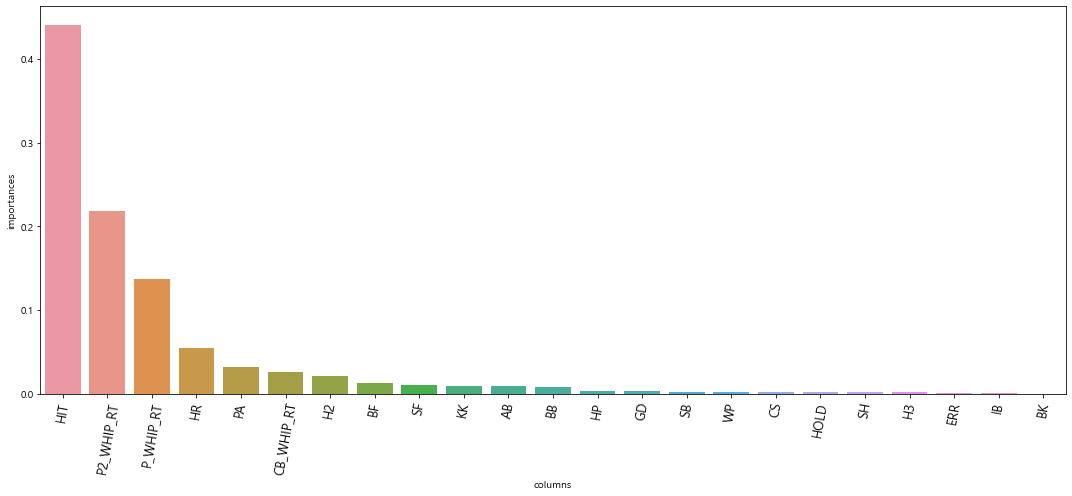

In [29]:
# LG(LG)
del LG['T_ID']
x = LG.drop(['ER','INN2'], axis=1).values # 독립변인들의 value값만 추출
y = (LG['ER'].values*9)/(LG['INN2'].values/3) # 종속변인 추출


features = list(LG.columns)
features.remove('ER')
features.remove('INN2')
df = pd.DataFrame(x, columns=features)

# RandomForest
clf = RandomForestRegressor(random_state=42, max_depth=6)
clf.fit(x, y)
feature_importance = clf.feature_importances_

# plot
df_fi = pd.DataFrame({'columns':df.columns, 'importances':feature_importance})
df_fi = df_fi[df_fi['importances'] > 0] 
df_fi = df_fi.sort_values(by=['importances'], ascending=False)

fig = plt.figure(figsize=(15,7))
ax = sns.barplot(df_fi['columns'], df_fi['importances'])
ax.set_xticklabels(df_fi['columns'], rotation=80, fontsize=13)
plt.tight_layout()
plt.show()

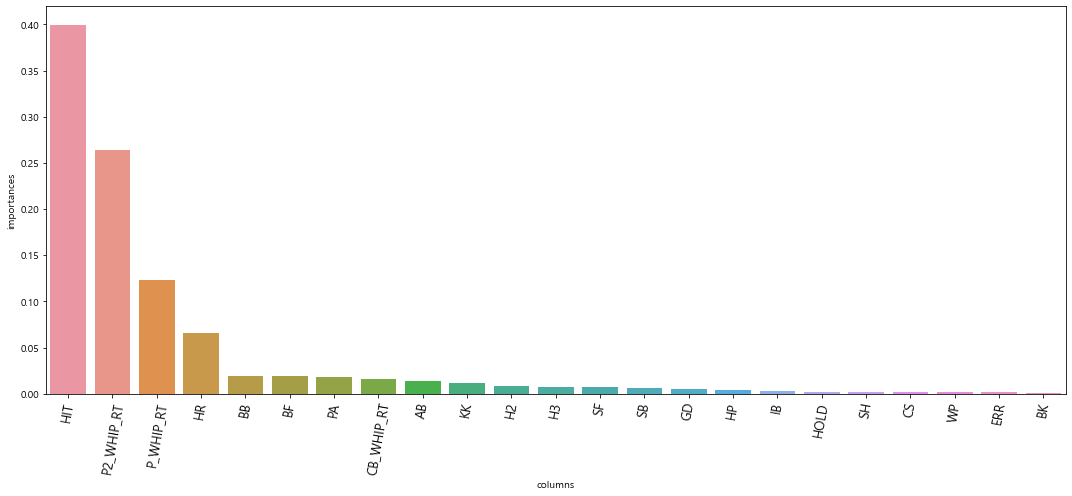

In [30]:
# LT(롯데)
del LT['T_ID']
x = LT.drop(['ER','INN2'], axis=1).values # 독립변인들의 value값만 추출
y = (LT['ER'].values*9)/(LT['INN2'].values/3) # 종속변인 추출


features = list(LT.columns)
features.remove('ER')
features.remove('INN2')
df = pd.DataFrame(x, columns=features)

# RandomForest
clf = RandomForestRegressor(random_state=42, max_depth=6)
clf.fit(x, y)
feature_importance = clf.feature_importances_

# plot
df_fi = pd.DataFrame({'columns':df.columns, 'importances':feature_importance})
df_fi = df_fi[df_fi['importances'] > 0] 
df_fi = df_fi.sort_values(by=['importances'], ascending=False)

fig = plt.figure(figsize=(15,7))
ax = sns.barplot(df_fi['columns'], df_fi['importances'])
ax.set_xticklabels(df_fi['columns'], rotation=80, fontsize=13)
plt.tight_layout()
plt.show()

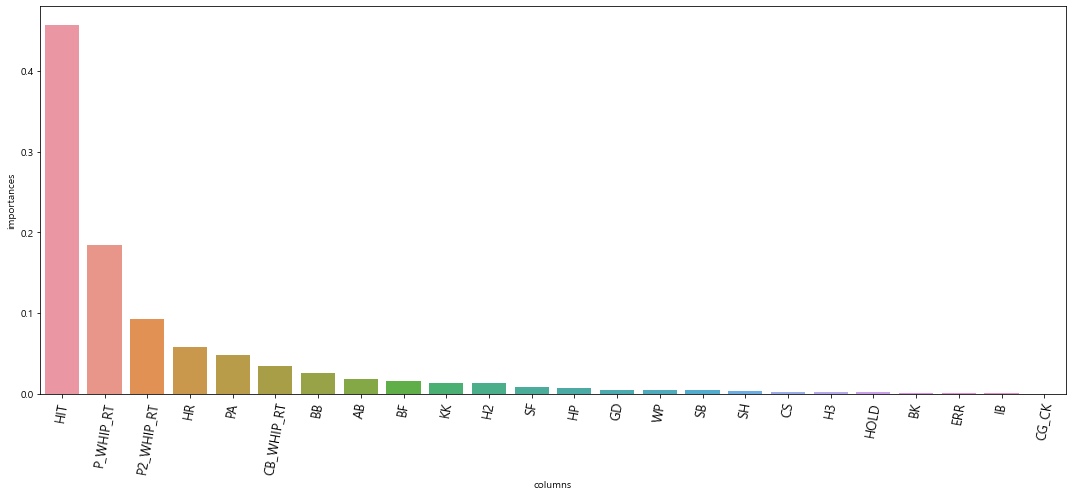

In [31]:
# NC(NC)
del NC['T_ID']
x = NC.drop(['ER','INN2'], axis=1).values # 독립변인들의 value값만 추출
y = (NC['ER'].values*9)/(NC['INN2'].values/3) # 종속변인 추출


features = list(NC.columns)
features.remove('ER')
features.remove('INN2')
df = pd.DataFrame(x, columns=features)

# RandomForest
clf = RandomForestRegressor(random_state=42, max_depth=6)
clf.fit(x, y)
feature_importance = clf.feature_importances_

# plot
df_fi = pd.DataFrame({'columns':df.columns, 'importances':feature_importance})
df_fi = df_fi[df_fi['importances'] > 0] 
df_fi = df_fi.sort_values(by=['importances'], ascending=False)

fig = plt.figure(figsize=(15,7))
ax = sns.barplot(df_fi['columns'], df_fi['importances'])
ax.set_xticklabels(df_fi['columns'], rotation=80, fontsize=13)
plt.tight_layout()
plt.show()

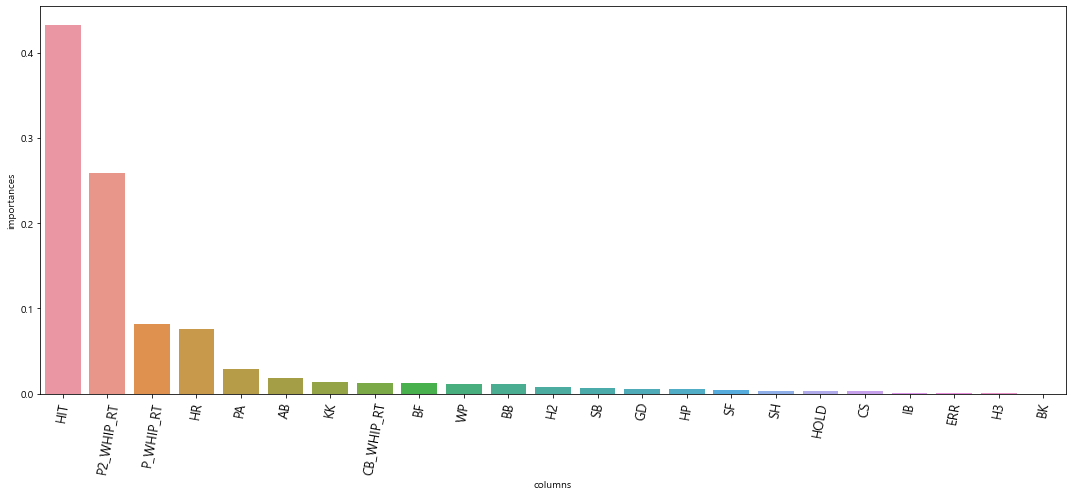

In [32]:
# SK(SK)
del SK['T_ID']
x = SK.drop(['ER','INN2'], axis=1).values # 독립변인들의 value값만 추출
y = (SK['ER'].values*9)/(SK['INN2'].values/3) # 종속변인 추출


features = list(SK.columns)
features.remove('ER')
features.remove('INN2')
df = pd.DataFrame(x, columns=features)

# RandomForest
clf = RandomForestRegressor(random_state=42, max_depth=6)
clf.fit(x, y)
feature_importance = clf.feature_importances_

# plot
df_fi = pd.DataFrame({'columns':df.columns, 'importances':feature_importance})
df_fi = df_fi[df_fi['importances'] > 0] 
df_fi = df_fi.sort_values(by=['importances'], ascending=False)

fig = plt.figure(figsize=(15,7))
ax = sns.barplot(df_fi['columns'], df_fi['importances'])
ax.set_xticklabels(df_fi['columns'], rotation=80, fontsize=13)
plt.tight_layout()
plt.show()

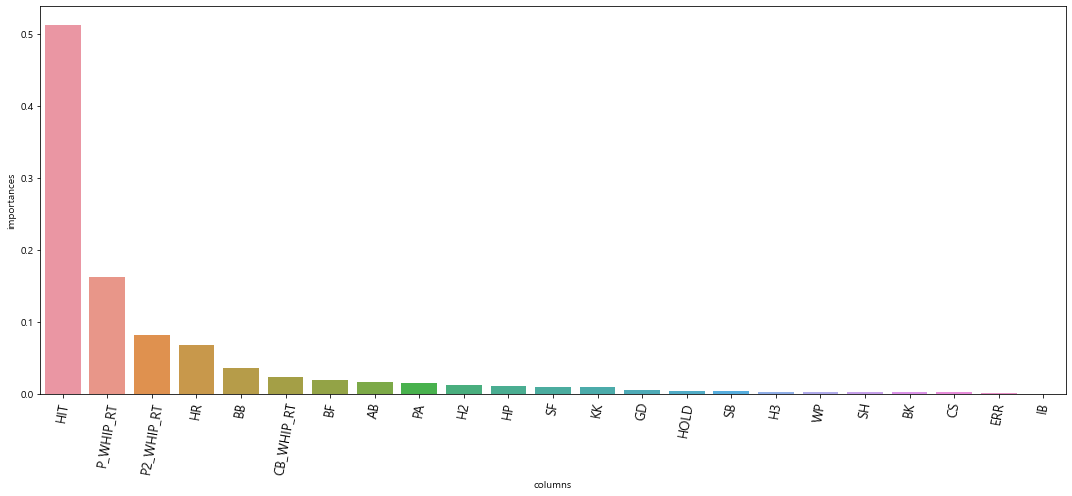

In [33]:
# SS(삼성)
del SS['T_ID']
x = SS.drop(['ER','INN2'], axis=1).values # 독립변인들의 value값만 추출
y = (SS['ER'].values*9)/(SS['INN2'].values/3) # 종속변인 추출


features = list(SS.columns)
features.remove('ER')
features.remove('INN2')
df = pd.DataFrame(x, columns=features)

# RandomForest
clf = RandomForestRegressor(random_state=42, max_depth=6)
clf.fit(x, y)
feature_importance = clf.feature_importances_

# plot
df_fi = pd.DataFrame({'columns':df.columns, 'importances':feature_importance})
df_fi = df_fi[df_fi['importances'] > 0] 
df_fi = df_fi.sort_values(by=['importances'], ascending=False)

fig = plt.figure(figsize=(15,7))
ax = sns.barplot(df_fi['columns'], df_fi['importances'])
ax.set_xticklabels(df_fi['columns'], rotation=80, fontsize=13)
plt.tight_layout()
plt.show()

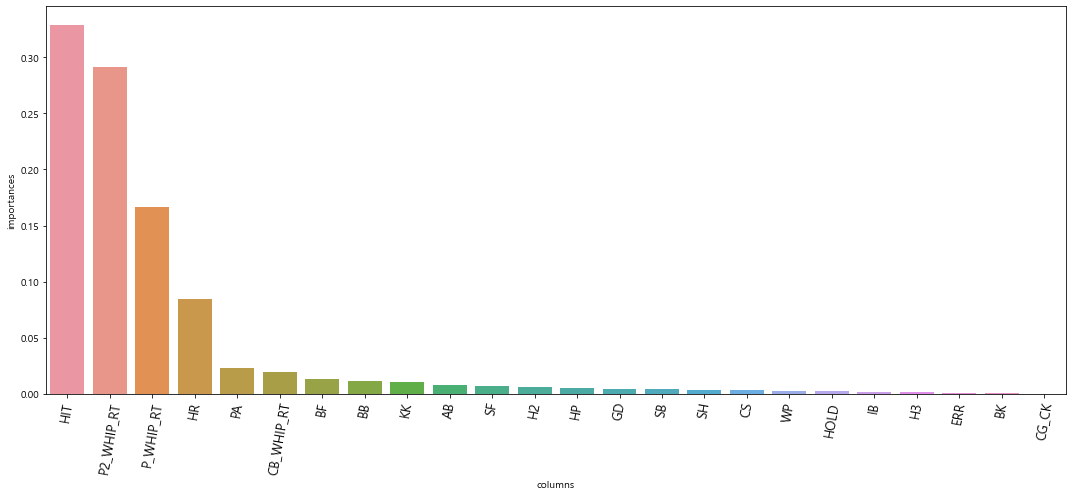

In [34]:
# WO(키움)
del WO['T_ID']
x = WO.drop(['ER','INN2'], axis=1).values # 독립변인들의 value값만 추출
y = (WO['ER'].values*9)/(WO['INN2'].values/3) # 종속변인 추출


features = list(WO.columns)
features.remove('ER')
features.remove('INN2')
df = pd.DataFrame(x, columns=features)

# RandomForest
clf = RandomForestRegressor(random_state=42, max_depth=6)
clf.fit(x, y)
feature_importance = clf.feature_importances_

# plot
df_fi = pd.DataFrame({'columns':df.columns, 'importances':feature_importance})
df_fi = df_fi[df_fi['importances'] > 0] 
df_fi = df_fi.sort_values(by=['importances'], ascending=False)

fig = plt.figure(figsize=(15,7))
ax = sns.barplot(df_fi['columns'], df_fi['importances'])
ax.set_xticklabels(df_fi['columns'], rotation=80, fontsize=13)
plt.tight_layout()
plt.show()